<h1 style="font-size: 40px;"><span style = "color:blue"> DATA SCIENCE FINAL PROJECT </span></h1>
<h2><span style = "color:#33ACFF"> How can we predict flight prices from Tel Aviv to New York JFK airport in December? </span></h2>

<h3><span style = "color: #0E98BD"><b> By Bar Sade </b></span></h3>

In [169]:
from tqdm import tqdm
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time
import bs4
import csv

<h2><span style="color:purple"> CREATING LIST OF LINKS </span></h2>

The list was taken from ChatGPT, I took a list of 31 days of December to apply web scraping on it.

In [2]:
## Links for each day on December 2023 from chatGPT
kayak_links = [
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-01?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-02?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-03?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-04?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-05?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-06?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-07?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-08?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-09?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-10?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-11?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-12?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-13?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-14?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-15?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-16?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-17?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-18?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-19?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-20?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-21?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-22?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-23?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-24?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-25?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-26?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-27?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-28?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-29?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-30?sort=bestflight_a",
    "https://www.il.kayak.com/flights/TLV-JFK/2023-12-31?sort=bestflight_a"
]

<h1><span style="color:red"> WEB SCRAPING PROCESS </span></h1>

I used 2 functions "scroll_to_element" and "scroll_and_load_more" to scroll down the page and click on 'Load more results' so I would be able to check all the flights in each date.
After it stopped scrolling and click on 'Load more' it starts collecting all the data regarding the criteria I chose.
All the data collected, saved in a csv file.
While writing the data into the csv file, I checked if the text value of 'j' element in every column list exceeded the lenght of the list, it assings the value of "N/A".

In [3]:
# Function to scroll down the page and click on "Load more results" until it's no longer available
def scroll_to_element(element):
    driver.execute_script("arguments[0].scrollIntoView(true);", element)
def scroll_and_load_more_results():
    while True:
        try:
            more_results_button = driver.find_element(By.XPATH, '//div[@class="ULvh-button show-more-button"]')
            scroll_to_element(more_results_button)
            time.sleep(60)
            driver.execute_script("arguments[0].click();", more_results_button)
            time.sleep(60)
        except:
            print('No more "Load more results" button found')
            break


# Create a CSV file and open it in write mode
with open('flight_data.csv', 'w', newline='') as file:
    csv_writer = csv.writer(file)

    # Write the header row
    csv_writer.writerow(['Date', 'Departure', 'Destination', 'Airline', 'Price', 'Departure Time', 'Arrival Time', 'Stops', 'Duration','Flight Type'])

    for i in range(len(kayak_links)):
        driver = webdriver.Chrome()
        new = kayak_links[i]
        driver.get(new)
        time.sleep(40)  # Sleep for the page to finish loading up

        # Scroll down and load more results
        scroll_and_load_more_results()
        print("Start Scraping")
        time.sleep(20)
        departures = driver.find_elements(By.XPATH, '//div[@title="Tel Aviv Ben Gurion Intl"]/span[@class="EFvI-ap-info"]/span[2]')
        destinations = driver.find_elements(By.XPATH, '//div[@title="New York John F Kennedy Intl"]/span[@class="EFvI-ap-info"]/span[2]')
        airlines = driver.find_elements(By.XPATH, '//div[@class="J0g6-operator-text"]')
        prices = driver.find_elements(By.XPATH, '//div[@class="f8F1-price-text"]')
        hour_from = driver.find_elements(By.XPATH, '//div[@class="vmXl vmXl-mod-variant-large"]/span[1]')
        arrival_hour = driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[3]')
        stops = driver.find_elements(By.XPATH, '//div[@class="vmXl vmXl-mod-variant-default"]/span[1]')
        duration = driver.find_elements(By.XPATH, '//div[@class="vmXl vmXl-mod-variant-default"]/parent::div[@class="xdW8 xdW8-mod-full-airport"]')
        class_type = driver.find_elements(By.XPATH, '//div[@class="aC3z-name"]')
        
        max_length = max(len(departures), len(destinations), len(airlines), len(prices), len(hour_from), len(arrival_hour), len(stops), len(duration), len(class_type))

        for j in tqdm(range(max_length), desc="Scraping Flights"):
            date = new.split('/')[-1].split('?')[0]  # Extract the date from the URL
            departure = departures[j].text if j < len(departures) else "N/A"
            destination = destinations[j].text if j < len(destinations) else "N/A"
            airline = airlines[j].text if j < len(airlines) else "N/A"
            price = prices[j].text if j < len(prices) else "N/A"
            hr_from = hour_from[j].text if j < len(hour_from) else "N/A"
            arr_hr = arrival_hour[j].text if j < len(arrival_hour) else "N/A"
            stop = stops[j].text if j < len(stops) else "N/A"
            dur = duration[j].text if j < len(duration) else "N/A"
            flight_class = class_type[j].text if j < len(class_type) else "N/A"
            
            # Write the data row to the CSV file
            csv_writer.writerow([date, departure, destination, airline, price, hr_from, arr_hr, stop, dur, flight_class])

        driver.quit()


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 574/574 [00:18<00:00, 30.45it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 447/447 [00:17<00:00, 25.33it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 491/491 [00:19<00:00, 24.95it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 571/571 [00:23<00:00, 23.88it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 553/553 [00:18<00:00, 29.21it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 455/455 [00:17<00:00, 25.62it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 586/586 [00:19<00:00, 29.54it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 202/202 [00:07<00:00, 25.55it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 424/424 [00:16<00:00, 25.06it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 587/587 [00:19<00:00, 30.57it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 562/562 [00:19<00:00, 29.43it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 568/568 [00:19<00:00, 29.42it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 595/595 [00:19<00:00, 30.75it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 560/560 [00:18<00:00, 30.49it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 571/571 [00:19<00:00, 29.42it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 429/429 [00:17<00:00, 24.53it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 562/562 [00:19<00:00, 29.28it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 547/547 [00:19<00:00, 27.94it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 568/568 [00:19<00:00, 29.35it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 468/468 [00:18<00:00, 25.47it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 585/585 [00:19<00:00, 29.30it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 456/456 [00:18<00:00, 25.13it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 516/516 [00:17<00:00, 28.83it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 474/474 [00:18<00:00, 25.63it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 547/547 [00:19<00:00, 28.48it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 559/559 [00:18<00:00, 29.60it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 468/468 [00:18<00:00, 25.27it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 472/472 [00:19<00:00, 24.38it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 594/594 [00:20<00:00, 28.84it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 446/446 [00:17<00:00, 25.04it/s]


No more "Load more results" button found
Start Scraping


Scraping Flights: 100%|███████████████████████| 556/556 [00:18<00:00, 29.57it/s]


<h2><span style="color:purple"> RESULTS </span></h2>

This code below, shows the results of my web scraping of 31 pages from Kayak.com.  
In addition, it shows the data scraped before cleaning.

In [160]:
## Results before cleaning data
read = pd.read_csv('flight_data.csv')
df = pd.DataFrame(read)
print("Results before cleaning data:\n")
df

Results before cleaning data:



,Date,Departure,Destination,Airline,Price,Departure Time,Arrival Time,Stops,Duration,Flight Type
0,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"ITA Airways, Norse Atlantic Airways","₪1,675",09:15,22:15,2 stops,20h 00m,Economy
1,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"Pegasus Airlines, Norse Atlantic Airways","₪1,325",05:25,22:15,2 stops,23h 50m,Economy
2,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,Royal Air Maroc,"₪2,449",07:15,17:55,1 stop,17h 40m,Economy
3,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,EL AL,"₪2,780",00:45,05:45,nonstop,12h 00m,Economy
4,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"Pegasus Airlines, Norse Atlantic Airways","₪1,649",07:20,22:15,2 stops,21h 55m,Economy
...,...,...,...,...,...,...,...,...,...,...
15988,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Special
15989,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Special
15990,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Special
15991,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Special


<h2><span style="color:purple"> START CLEANING </span></h2>

In the code below, I start cleaning all the none results data which contains N/A.  
The function opens the csv file for reading and reads the content of the csv file.  
Right after reading the content, it filters out the rows that contains N/A values and rewrite the remainig rows.  
Then, I used a function to check if the cleaned csv file contains empty values.


In [161]:
df = pd.read_csv('flight_data.csv')
df = df.dropna()
df = df.reset_index(drop=True)

print("Rows with empty data (N/A results) have been cleaned.")

Rows with empty data (N/A results) have been cleaned.


<h2><span style="color:purple"> FINAL RESULTS </span></h2>

This code below, represent the cleaned results of data scraping from Kayak.com, organized by date, departure, destination, airline, price, departure time, arrival time, stops, duration and flight type.  
The results does not contain any empty values.

In [162]:
print("Results after data cleaning:\n")
df

Results after data cleaning:



,Date,Departure,Destination,Airline,Price,Departure Time,Arrival Time,Stops,Duration,Flight Type
0,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"ITA Airways, Norse Atlantic Airways","₪1,675",09:15,22:15,2 stops,20h 00m,Economy
1,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"Pegasus Airlines, Norse Atlantic Airways","₪1,325",05:25,22:15,2 stops,23h 50m,Economy
2,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,Royal Air Maroc,"₪2,449",07:15,17:55,1 stop,17h 40m,Economy
3,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,EL AL,"₪2,780",00:45,05:45,nonstop,12h 00m,Economy
4,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"Pegasus Airlines, Norse Atlantic Airways","₪1,649",07:20,22:15,2 stops,21h 55m,Economy
...,...,...,...,...,...,...,...,...,...,...
14140,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Air Canada","₪37,031",18:25,12:41+1,2 stops,25h 16m,Main Cabin Flex
14141,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Air Canada","₪37,031",11:50,12:41+1,2 stops,31h 51m,Economy Fully Flex
14142,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Air Canada","₪37,031",18:25,22:21+1,2 stops,34h 56m,Main Cabin Flex
14143,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Cathay Pacific","₪73,504",11:50,19:05+1,2 stops,38h 15m,Main Cabin Flex


<h2><span style="color:purple"> OVERVIEW OF THE DATAFRAME, STRUCTURE AND BASIC STATISTICS OF THE SCRAPED DATA </span></h2>

The code below, inspecting the structure and content of the DataFrame, helps for understanding the data types and missing values in the DataFrame and gives an overview of the central tendency and dispersion of the data.  
We can see the count, unique, top and frequency of each column.

In [163]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            14145 non-null  object
 1   Departure       14145 non-null  object
 2   Destination     14145 non-null  object
 3   Airline         14145 non-null  object
 4   Price           14145 non-null  object
 5   Departure Time  14145 non-null  object
 6   Arrival Time    14145 non-null  object
 7   Stops           14145 non-null  object
 8   Duration        14145 non-null  object
 9   Flight Type     14145 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


,Date,Departure,Destination,Airline,Price,Departure Time,Arrival Time,Stops,Duration,Flight Type
count,14145,14145,14145,14145,14145,14145,14145,14145,14145,14145
unique,31,1,1,171,1876,119,193,4,388,44
top,2023-12-21,Ben Gurion Intl,John F Kennedy Intl,Brussels Airlines,"₪10,063",05:15,13:40+1,2 stops,20h 25m,Economy
freq,494,14145,14145,1437,409,2113,1037,7247,340,3406


<h3><span style = "color:Blue"> FIXING COLUMNS </span></h3>

This code will convert the Price column to float and remove the currency symbol.
Converting Duration column values into minutes by splitting the string on ':' and applying a lambda function that converts the hours and minutes into total minutes.  
It extracts the hour component from the 'Departure Time' and 'Arrival Hour' columns using regular expressions and assigns it to the 'Departure Hour' and 'Arrival Hour' columns.

In [164]:
df['Price'] = df['Price'].astype(str).str.replace('₪', '').str.replace(',', '')
df['Price'] = df['Price'].astype(float)
df['Duration'] = df['Duration'].astype(str).str.replace('h', ':').str.replace('m', '')
df['Duration'] = df['Duration'].apply(lambda x: sum(int(i) * 60 ** index for index, i in enumerate(x.split(':')[::-1])) if pd.notnull(x) else np.nan)
df['Departure Hour'] = df['Departure Time'].str.extract(r'(\d{2}):\d{2}')[0].astype(int)
df['Arrival Hour'] = df['Arrival Time'].str.extract(r'(\d{2}):\d{2}')[0].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

df

,Date,Departure,Destination,Airline,Price,Departure Time,Arrival Time,Stops,Duration,Flight Type,Departure Hour,Arrival Hour
0,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"ITA Airways, Norse Atlantic Airways",1675.0,09:15,22:15,2 stops,1200,Economy,9,22
1,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"Pegasus Airlines, Norse Atlantic Airways",1325.0,05:25,22:15,2 stops,1430,Economy,5,22
2,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,Royal Air Maroc,2449.0,07:15,17:55,1 stop,1060,Economy,7,17
3,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,EL AL,2780.0,00:45,05:45,nonstop,720,Economy,0,5
4,2023-12-01,Ben Gurion Intl,John F Kennedy Intl,"Pegasus Airlines, Norse Atlantic Airways",1649.0,07:20,22:15,2 stops,1315,Economy,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...
14140,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Air Canada",37031.0,18:25,12:41+1,2 stops,1516,Main Cabin Flex,18,12
14141,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Air Canada",37031.0,11:50,12:41+1,2 stops,1911,Economy Fully Flex,11,12
14142,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Air Canada",37031.0,18:25,22:21+1,2 stops,2096,Main Cabin Flex,18,22
14143,2023-12-31,Ben Gurion Intl,John F Kennedy Intl,"Emirates, Cathay Pacific",73504.0,11:50,19:05+1,2 stops,2295,Main Cabin Flex,11,19


<h1><span style="color:red"> EDA AND VISUALIZATION </span></h1>

<h2><span style="color:purple"> STOPS VS DURATION </span></h2>

The violin plot help us understand the relationship between the number of stops and the average duration of flights.  
The plot allows us to visually compare the distribution of flight durations for different stop categories.
The violin plot visualizes the distribution and variation of flight durations for each stop category, allowing us to understand the typical duration range and any differences between different stop categories.

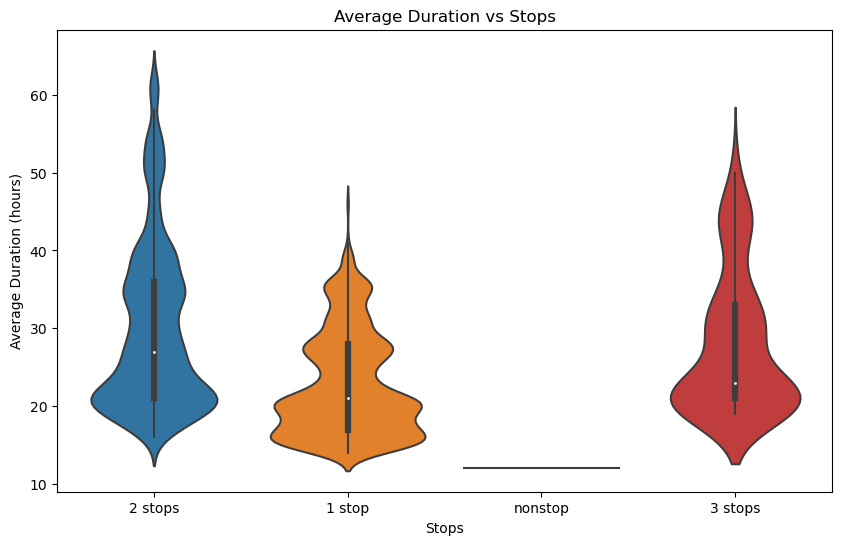

In [144]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Stops', y='Duration (hours)', data=df)
plt.xlabel('Stops')
plt.ylabel('Average Duration (hours)')
plt.title('Average Duration vs Stops')
plt.show()


<h2><span style="color:purple"> PRICE VS DATE </span></h2>

This code below, shows the relationship between the Average Price and the Date.
By plotting the average price against dates, we can observe how the price fluctuates over time.  
This visualization helps in understanding the general trend and any patterns or trends in the average price.  
It provides insights into whether the prices are increasing, decreasing, or staying relatively stable over the given period. 

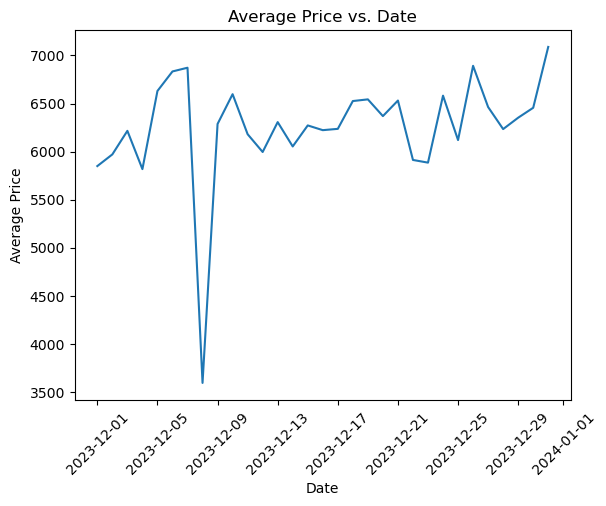

In [145]:
average_price_by_date = data.groupby('Date')['Price'].mean()
plt.plot(average_price_by_date.index, average_price_by_date.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price vs. Date')
plt.xticks(rotation=45)
plt.show()


<h2><span style="color:purple"> FLIGHT TYPES VS STOPS </span></h2>

The graph helps us understand the relationship between flight types and the number of stops for the top 5 common flight types.  
Each bar in the graph represents a flight type, and the height of the bar represents the count of flights for each combination of flight type and number of stops.  
By analyzing this graph, we can gain insights into the distribution of flight types across different numbers of stops.  
It allows us to observe the preferences of passengers in terms of flight types and their willingness to choose flights with varying numbers of stops.

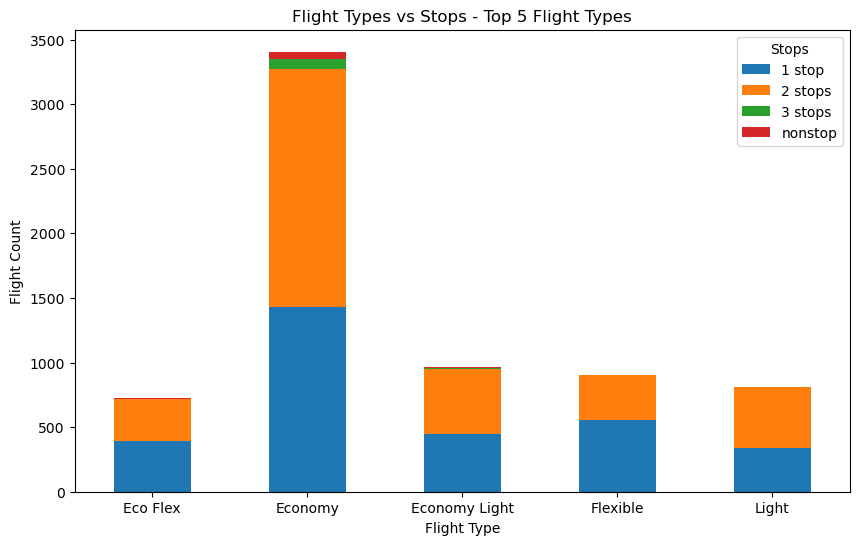

In [146]:
# Get the counts of 5 common flight type
flight_type_counts = df['Flight Type'].value_counts()
top_flight_types = flight_type_counts.head(5)

# Group the data by flight type and stops and calculate the counts
grouped_data = df[df['Flight Type'].isin(top_flight_types.index)].groupby(['Flight Type', 'Stops']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Flight Type')
plt.ylabel('Flight Count')
plt.title('Flight Types vs Stops - Top 5 Flight Types')
plt.legend(title='Stops')
plt.xticks(rotation=0)

plt.show()


<h2><span style = "color:purple"> 5 COMMON ARILINES </span></h2>

The pie chart represents the distribution of flights among the top 5 common airlines.  
Each slice of the pie represents an airline, and the size of each slice corresponds to the proportion of flights operated by that airline.
By analyzing this pie chart, we can gain insights into the market share or popularity of each airline within the dataset.  
The percentage values displayed on each slice indicate the relative contribution of each airline to the total number of flights

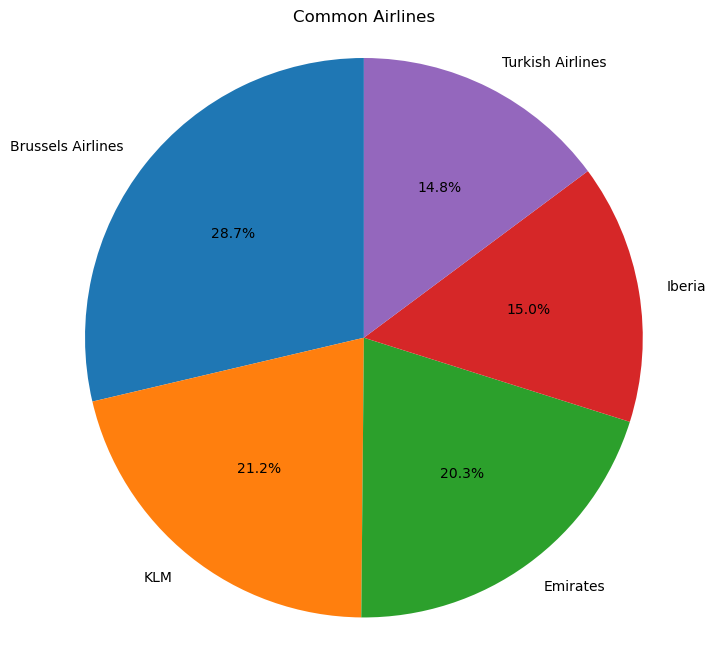

In [147]:
# Get the counts of 5 common airline
airline_counts = df['Airline'].value_counts()
top_airlines = airline_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_airlines, labels=top_airlines.index, autopct='%1.1f%%', startangle=90)
plt.title('Common Airlines')
plt.axis('equal')

plt.show()


<h2><span style = "color:purple"> AVERAGE DURATION BY HOURS VS AVERAGE PRICE </span></h2>

The code helps us understand the relationship between the average duration (in hours) of flights and their corresponding average prices.
Overall, this visualization enables us to explore the connection between flight duration (in hours) and average prices, potentially uncovering insights that can inform pricing strategies, customer preferences, or other relevant factors in the airline industry.

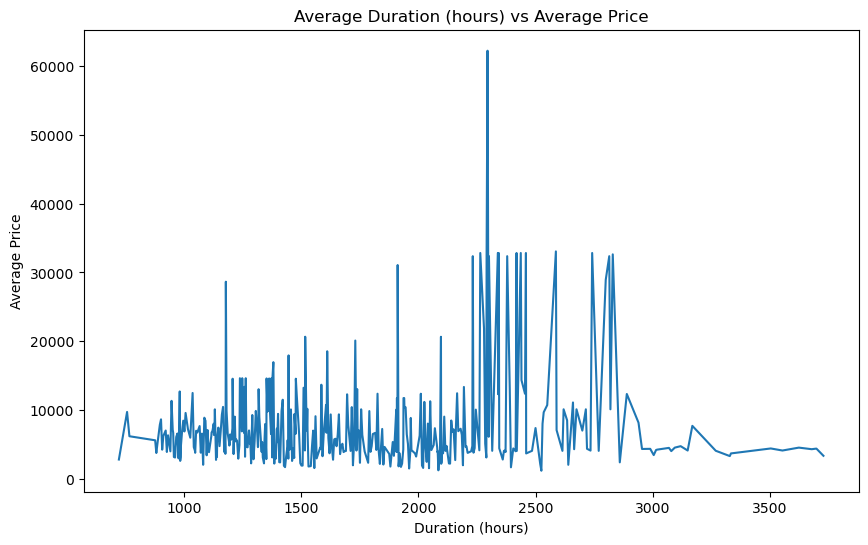

In [149]:
# Calculate the average duration and average price
average_duration_price = df.groupby('Duration')['Price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_duration_price.index, average_duration_price)
plt.xlabel('Duration (hours)')
plt.ylabel('Average Price')
plt.title('Average Duration (hours) vs Average Price')
plt.show()

<h2><span style = "color:purple"> AVERAGE PRICE BY DAY OF THE WEEK </span></h2>

The code helps us understand the average price patterns based on the day of the week.  
It shows the relationship between the average prices and the day of the week.  
By visualizing the average prices for each day, we can gain insights into how prices fluctuate throughout the week and identify any patterns or trends

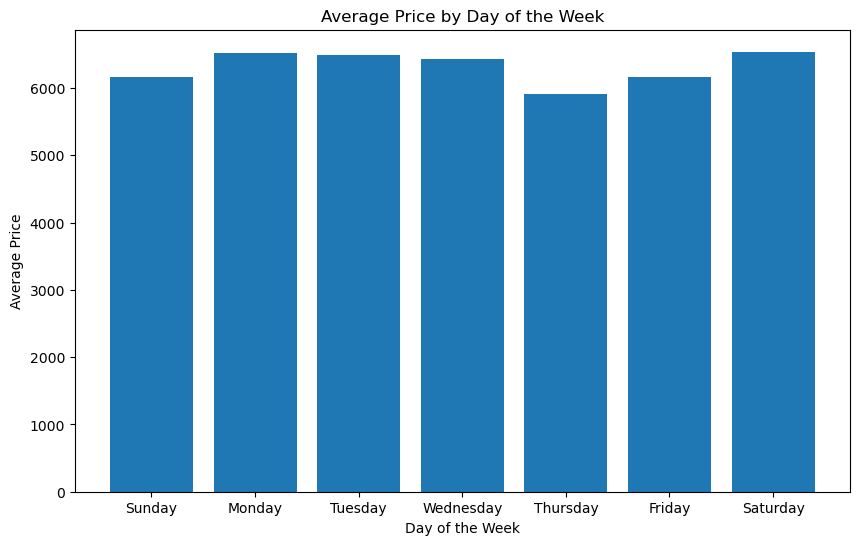

In [150]:
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

# Calculate the average price for each day of the week
avg_prices = df.groupby('DayOfWeek')['Price'].mean()

day_labels = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))

plt.bar(day_labels, avg_prices)

plt.title('Average Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

plt.show()

<h2><span style = "color:purple"> AVERAGE PRICE BY MORNING OR EVENING FLIGHT </span></h2>

This code helps us understand the average price difference between morning and evening flights based on the departure hour, we can analyze whether there is a significant variation in average prices between these time periods.  
It helps us gain insights into the relationship between flight departure hour and average prices, which can be useful for making informed decisions related to flight bookings and pricing strategies.

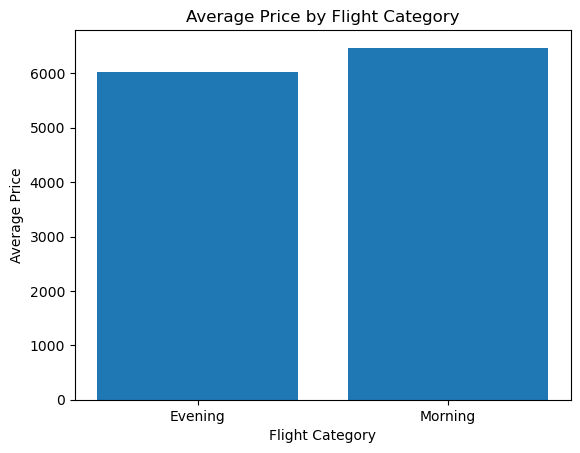

In [153]:
df['Hour'] = pd.to_datetime(df['Departure Time']).dt.hour

# Categorize flights as morning or evening based on departure hour
df['Flight Category'] = df['Hour'].apply(lambda hour: 'Morning' if hour < 12 else 'Evening')
avg_prices = df.groupby('Flight Category')['Price'].mean()
plt.bar(avg_prices.index, avg_prices)

plt.title('Average Price by Flight Category')
plt.xlabel('Flight Category')
plt.ylabel('Average Price')

plt.show()


<h2><span style = "color:purple"> DISTRIBUTION OF STOPS </span></h2>

This code helps us understand the distribution of flights based on the number of stops. It calculates the count of flights for each stop category (such as nonstop, 1 stop, 2 stops, etc.) and visualizes it in a pie chart.  
The code enables us to gain insights into the prevalence of different stop categories in the dataset

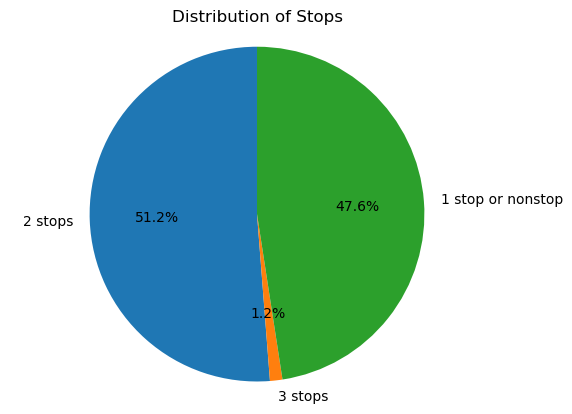

In [154]:
stop_counts = df['Stops'].value_counts()

# Combine 'nonstop' category with '1 stop'
stop_counts['1 stop or nonstop'] = stop_counts.get('1 stop', 0) + stop_counts.get('nonstop', 0)
stop_counts = stop_counts.drop(['1 stop', 'nonstop'])

plt.pie(stop_counts, labels=stop_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Stops')
plt.axis('equal')
plt.show()


<h1><span style="color:red"> MACHINE LEARNING </span></h1>

In terms of performance, the Random Forest model achieved a lower Mean Squared Error (MSE) than the Linear Regression model.  
In this case, indicating better predictive accuracy.  
This suggests that the Random Forest model is better suited for capturing the underlying patterns and making accurate price predictions.  
The Random Forest model helps us learn the important features and their relationships with the target variable, providing insights into the factors that influence flight prices.  
It can handle a wide range of data types, handle non-linear relationships, and make accurate predictions, making it a powerful tool for machine learning tasks.

<h3><span style = "color:Blue"> USING LINEAR REGRESSION MODEL </span></h3>

The code outcome reveals that the linear regression model obtained a Mean Squared Error (MSE) value of 3,221,921.82 and R squared score of 88.9%.  
This code exemplifies the construction of a linear regression model that aims to predict flight prices using various features.  
It emphasizes the significance of crucial steps such as data preprocessing, feature engineering, model training, and evaluation.  
I will try other models to check if I can get lower MSE and higher R squred score

In [175]:
# Select the features and target variable
X = df[['Date', 'Departure', 'Destination', 'Airline', 'Stops', 'Duration', 'Flight Type', 'Departure Hour', 'Arrival Hour']]
y = df['Price']

categorical_cols = ['Date', 'Departure', 'Destination', 'Airline', 'Stops', 'Flight Type']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", r2)

Mean Squared Error: 3221921.8152288767
Root Mean Squared Error: 1794.9712574938007
R-squared score: 0.8891557812476342


<h3><span style = "color:Blue"> USING DECISION TREE </span></h3>

A Decision Tree can help us learn about the importance of different features, decision rules for predicting flight prices, nonlinear relationships, outlier detection, pricing patterns, and pricing boundaries.  
This knowledge can contribute to understanding the factors influencing flight prices and aid in making predictions and informed decisions in the airline industry.  
The MSE result 2,223,596 is lower than the Linear Regression model. The R squared score of 92% is higher.
Therfore, I can decide that the Decision Tree model is better than the Linear Regression model.  

In [176]:
# Select the features and target variable
X = df[['Date', 'Departure', 'Destination', 'Airline', 'Stops', 'Duration', 'Flight Type', 'Departure Hour', 'Arrival Hour']]
y = df['Price']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
regression_model = DecisionTreeRegressor()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", r2)

Mean Squared Error: 2311450.0129101267
Root Mean Squared Error: 1520.3453597489377
R-squared score: 0.9204788677195234


<h3><span style = "color:Blue"> USING RANDOM FOREST MODEL </span></h3>

Random Forest model helps us learn the process of preparing the data, engineering relevant features, training a machine learning model, and evaluating its performance in predicting flight prices.
The model is an extension of the decision tree algorithm and combines multiple decision trees to make more accurate predictions.
The MSE value of 1,597,229 is much lower than both Linear Regression model and Decision Tree and the R squared score is 94.5% which is higher than the score in Decision Tree model.  

<h4><span style = "color:green">Based on the metrics above, the Random Forest model is generally considered better for predicting flight prices compared to the Decision Tree model. It achieves lower errors and a higher R-squared score, indicating improved predictive performance </span></h4>

In [177]:
# Select the features and target variable
X = df[['Date', 'Departure', 'Destination', 'Airline', 'Stops', 'Duration', 'Flight Type', 'Departure Hour', 'Arrival Hour']]
y = df['Price']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
regression_model = RandomForestRegressor()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", r2)

Mean Squared Error: 1585552.5361237612
Root Mean Squared Error: 1259.1872522082492
R-squared score: 0.945452018318146


<h1><span style="color:red"> CONCLUSIONS </span></h1>

This topic is very interests me, I love to make comparisons in flight prices when me or my family wants to fly.  
According to the data collected and the R-squared score of 94%, it seems like the model shows promising results in predicting flight prices.